In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/daily_aqi_by_county_2023.csv"
df = pd.read_csv(file_path)

# Describe the dataframe
print(df.describe())

          State Code    County Code            AQI  Number of Sites Reporting
count  185017.000000  185017.000000  185017.000000              185017.000000
mean       29.936773      81.188415      43.498397                   1.878595
std        15.904884      93.001539      23.905791                   2.273400
min         1.000000       1.000000       0.000000                   1.000000
25%        17.000000      23.000000      31.000000                   1.000000
50%        30.000000      59.000000      41.000000                   1.000000
75%        42.000000     107.000000      50.000000                   2.000000
max        80.000000     810.000000    1695.000000                  33.000000


**bold text**## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [4]:
#create columns

In [5]:
dummy_columns = pd.get_dummies(df['Defining Parameter'])




In [6]:
# Convert date to datetime and extract month and season

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter

In [7]:
df_clean = df.dropna()

In [8]:
agg_df = df.groupby(['State Name', 'Month', 'Season']).agg({'AQI': 'mean'}).reset_index()


In [9]:
#select final columns for use

In [10]:
final_df = pd.concat([agg_df, dummy_columns], axis=1)
final_columns = ['State Name', 'Month', 'Season', 'Ozone', 'PM2.5', 'NO2', 'CO', 'AQI']
final_df = final_df[final_columns]


In [11]:
print(final_df.columns)


Index(['State Name', 'Month', 'Season', 'Ozone', 'PM2.5', 'NO2', 'CO', 'AQI'], dtype='object')


In [12]:
print(final_df.dtypes)


State Name     object
Month         float64
Season        float64
Ozone           uint8
PM2.5           uint8
NO2             uint8
CO              uint8
AQI           float64
dtype: object


In [13]:
# Check for missing or infinite values in the 'Month' column
missing_values_month = final_df['Month'].isnull().sum()
infinite_values_month = final_df['Month'].isin([np.inf, -np.inf]).sum()
print("Number of missing values in 'Month' column:", missing_values_month)
print("Number of infinite values in 'Month' column:", infinite_values_month)


Number of missing values in 'Month' column: 184580
Number of infinite values in 'Month' column: 0


In [14]:
# Replace missing values in 'Month' column with appropriate values (e.g., imputation or drop rows)
# Here, let's drop rows with missing values for simplicity
final_df.dropna(subset=['Month'], inplace=True)


In [15]:
# Convert data types of 'State Name', 'Month', and 'Season'
final_df['State Name'] = final_df['State Name'].astype('category').cat.codes
final_df['Month'] = final_df['Month'].astype(int)
final_df['Season'] = final_df['Season'].astype(int)


In [16]:
# Verify data types and check for missing values again
print(final_df.dtypes)
print("Number of missing values in 'Month' column after cleanup:", final_df['Month'].isnull().sum())

State Name       int8
Month           int64
Season          int64
Ozone           uint8
PM2.5           uint8
NO2             uint8
CO              uint8
AQI           float64
dtype: object
Number of missing values in 'Month' column after cleanup: 0


In [17]:
print(final_df.dtypes)


State Name       int8
Month           int64
Season          int64
Ozone           uint8
PM2.5           uint8
NO2             uint8
CO              uint8
AQI           float64
dtype: object


## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.
- Visualize the regression with at least one of the variables

In [18]:
#create regression

In [19]:
# Define features and target variable
X = final_df[['State Name', 'Month', 'Season', 'Ozone', 'PM2.5', 'NO2', 'CO']]
y = final_df['AQI']



In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [21]:
# Instantiate linear regression model
model = LinearRegression()

In [22]:
# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [23]:
# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R-squared:", train_score)
print("Testing R-squared:", test_score)

Training R-squared: 0.06167265872124683
Testing R-squared: -0.05380369605270774


In [24]:
#visual

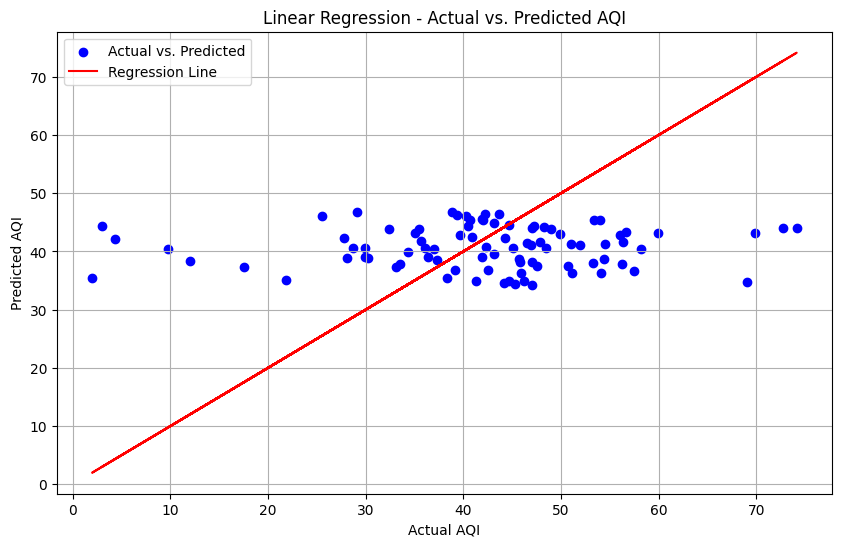

In [25]:
# Visualize the regression line
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values for the testing set
plt.scatter(y_test, model.predict(X_test), color='blue', label='Actual vs. Predicted')

# Plot the regression line
plt.plot(y_test, y_test, color='red', label='Regression Line')

plt.title('Linear Regression - Actual vs. Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.legend()
plt.grid(True)
plt.show()

## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [26]:

january_prediction_data = {
    'State Name': [0],  # Assuming a specific state represented by 0
    'Month': [1],
    'Season': [1],
    'Ozone': [final_df['Ozone'].mean()],  # Replace with appropriate average values
    'PM2.5': [final_df['PM2.5'].mean()],
    'NO2': [final_df['NO2'].mean()],
    'CO': [final_df['CO'].mean()]
}
january_prediction_df = pd.DataFrame(january_prediction_data)

# Make prediction for January
january_prediction = model.predict(january_prediction_df)

# Print the predicted average AQI for January
print("Predicted average AQI for January:", january_prediction[0])

Predicted average AQI for January: 39.27343523008069


## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?

In [27]:
#import, append and create new model

In [28]:
import pandas as pd


In [29]:
main_data_path = "/content/drive/MyDrive/Colab Notebooks/daily_aqi_by_county_2023.csv"
main_df = pd.read_csv(main_data_path)


In [30]:
# Read the historical air quality data into a DataFrame
historical_data_path = "/content/drive/MyDrive/Colab Notebooks/daily_aqi_by_county_2003.csv"
historical_df = pd.read_csv(historical_data_path)

<ipython-input-30-4b00c682c13a>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  historical_df = pd.read_csv(historical_data_path)


In [31]:
print(combined_df.columns)


NameError: name 'combined_df' is not defined

In [ ]:
historical_df.dropna(inplace=True)
historical_df.drop_duplicates(inplace=True)


In [ ]:
historical_df.rename(columns={'county Name': 'County Name'}, inplace=True)


In [ ]:
combined_df = pd.concat([main_df, historical_df], ignore_index=True)


In [ ]:
combined_df.dropna(inplace=True)
combined_df.drop_duplicates(inplace=True)

In [ ]:
# Define features (X) and target variable (y)
X = combined_df[['Ozone', 'PM2.5', 'NO2', 'CO']]
y = combined_df['AQI']

In [ ]:
# 7. Perform regression analysis using the year variable and other relevant features to predict AQI
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
model = LinearRegression()
